# $$\text{Neural Network from Scratch}$$
---
<p style="text-align:right; font-family:'Old English';"><i>Reference: Various | By: Shreeyansh Das</i></p>


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# $\text{0. The MNIST Handwritten Digits Dataset}$
The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting <i>(LeCun et al., 1998)</i>.

This set has been studied so much that it is often called the "Hello World" of Machine Learning: whenever people come up with a new classification algorithm, they are curious to see how it will perform on MNIST. Whenever someone learns Machine Learning, sooner or later they tackle MNIST.

## $\text{Dataset Description and Loading}$

The data is stored in a very simple file format designed for storing vectors and multidimensional matrices.

There are 4 files:

- `train-images-idx3-ubyte`: Training set images. Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black). 
- `train-labels-idx1-ubyte`: Training set labels. The labels values are 0 to 9.
- `t10k-images-idx3-ubyte`:  Test set images. The labels values are 0 to 9.
- `t10k-labels-idx1-ubyte`:  Test set labels. Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).

> The training set contains **60,000 examples**, and the test set **10,000 examples**.

The first 5000 examples of the test set are taken from the original NIST training set. The last 5000 are taken from the original NIST test set. The first 5000 are cleaner and easier than the last 5000.



`idx2numpy` package provides a tool for converting files to and from IDX format to `numpy.ndarray`.

In [2]:
import idx2numpy

In [3]:
X_train = idx2numpy.convert_from_file("C:/Users/asus/Desktop/ML Implementation/MNIST HWD/train-images.idx3-ubyte")
y_train = idx2numpy.convert_from_file("C:/Users/asus/Desktop/ML Implementation/MNIST HWD/train-labels.idx1-ubyte")

X_test = idx2numpy.convert_from_file("C:/Users/asus/Desktop/ML Implementation/MNIST HWD/t10k-images.idx3-ubyte")
y_test = idx2numpy.convert_from_file("C:/Users/asus/Desktop/ML Implementation/MNIST HWD/t10k-labels.idx1-ubyte")

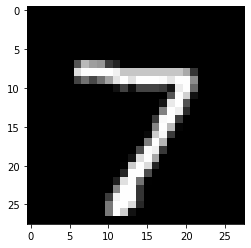

In [4]:
plt.imshow(X_test[0,:,:], cmap = 'gray')

# $\text{1. Data Preprocessing and Visualization}$

In [5]:
print("Shape of train data:", X_train.shape)
print("Shape of test data:", X_test.shape)

Shape of train data: (60000, 28, 28)
Shape of test data: (10000, 28, 28)


Each example in the dataset is a 28 by 28 image with pixel values represented in a grayscale format. Thus we have 60,000 such examples in the training data and 10,000 in test data. Initially the labels for both the train array and test array are stored in different arrays.

In [6]:
print("Shape of train label:", y_train.shape)
print("Shape of test label:", y_test.shape)

Shape of train label: (60000,)
Shape of test label: (10000,)


The dataset contains 60,000 training examples
- Each training example is a $28-pixel \times 28-pixel$ grayscale image of the digit.
    - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location.
    - The 28 by 28 grid of pixels is "unrolled" into a 784-dimensional vector.
    - Each training example becomes a single row in our data matrix `X_train`.
    - This gives us a $60,000 \times 784$ matrix X where every row is a training example of a handwritten digit image.

<center><br><br> 
    $ \large X_{train} = \begin{bmatrix} \longleftarrow x^{(1)} \longrightarrow \\ \longleftarrow x^{(2)} \longrightarrow \\ \vdots \\ \longleftarrow x^{(60,000)} \longrightarrow \end{bmatrix}_{\ 60,000\times 784} $
    $ \large y_{train} = \begin{bmatrix}y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(60,000)} \end{bmatrix}_{\ 60,000\times 1}$<br><br>
    $ \large X_{test} = \begin{bmatrix} \longleftarrow x^{(1)} \longrightarrow \\ \longleftarrow x^{(2)} \longrightarrow \\ \vdots \\ \longleftarrow x^{(10,000)} \longrightarrow \end{bmatrix}_{\ 10,000\times 784} $
    $ \large y_{test} = \begin{bmatrix}y^{(1)}\\ y^{(2)} \\ \vdots \\ y^{(10,000)} \end{bmatrix}_{\ 10,000\times 1} $</center> 

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train = np.reshape(X_train, (60000, 28*28))
X_test = np.reshape(X_test, (10000, 28*28))

In [9]:
print("Shape of train data:", X_train.shape)
print("Shape of test data:", X_test.shape)

Shape of train data: (60000, 784)
Shape of test data: (10000, 784)


In [10]:
y_train = y_train[:,np.newaxis]
y_test = y_test[:,np.newaxis]

print("Shape of train label:", y_train.shape)
print("Shape of test label:", y_test.shape)

Shape of train label: (60000, 1)
Shape of test label: (10000, 1)


Plotting random 15 images from `X_train`

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


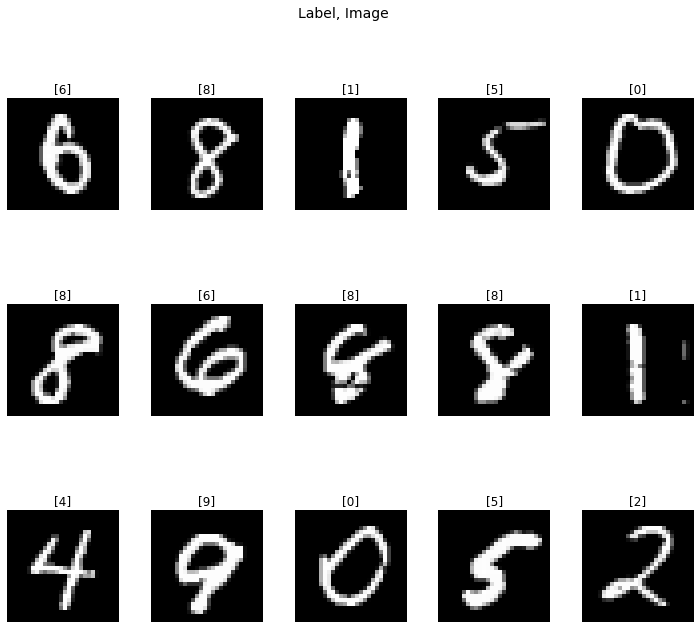

In [11]:
m, n = X_train.shape

fig, axes = plt.subplots(3,5, figsize=(10,10))
fig.tight_layout(pad=0.13,rect=[0, 0.05, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y_train[random_index])
    ax.set_axis_off()
    fig.suptitle("Label, Image", fontsize=14)

# $\text{2. Defining Model Architecture}$

The input layer is considered as layer 1 and is simply the pixel values of each image unrolled in a row-major $784$ units vector. We will have a $[784-20-15-10]$ 4-layer Neural Network with 2 hidden layers 1 input layer and 1 output layer. The first 2 layers will have relu as the activation function and the output layer will have linear/no activation. Finally we take softmax of all the 10 units to determine which digit is predicted by our model.

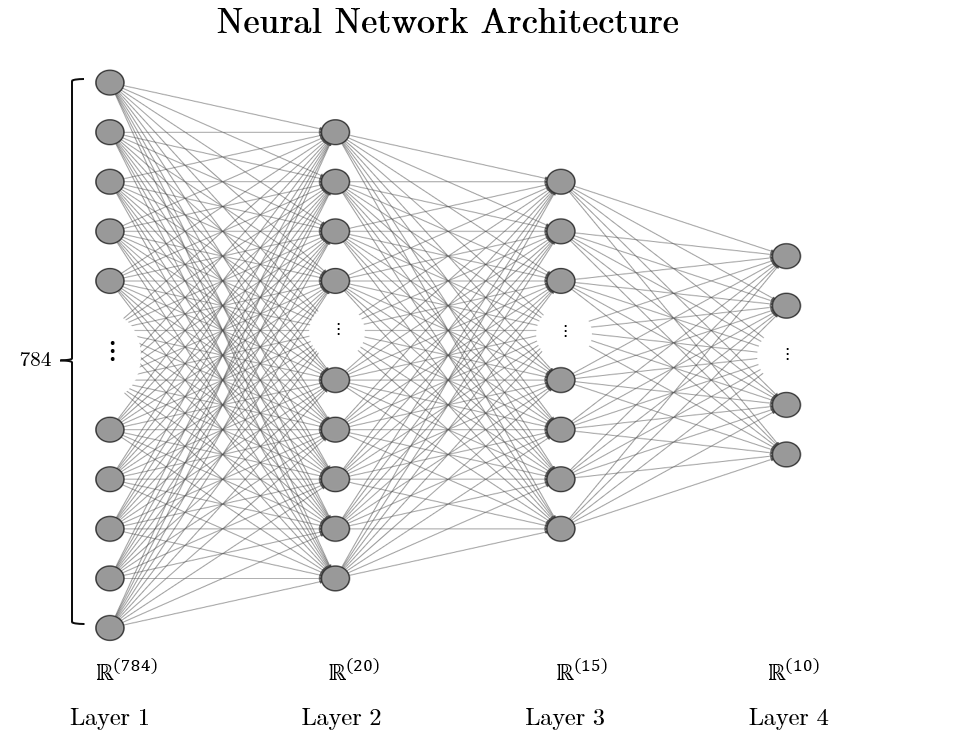

## $\text{2.0 Notations}$

- Superscript $[l]$ denotes the quantity associated with layer $l$
    - Example: $a^{[l]}$ is $(l+1)^{th}$ layer activation. $W^{[l]}$ and $b^{[l]}$ are $L^{th}$ layer parameters
- Superscript $(i)$ denotes the quantity associated with training example $i$
    - Example: $x^{(i)}$ is $i^{th}$ training example.

## $\text{2.1 Initialising Weights and Biases}$

The dimesions can be determined as follows: If a layer has $S_{j}$ units in layer $j$ and $S_{j+1}$ units in layer $j+1$, then the weight matrix between layer $j$ and $j+1$ will have dimensions $S_{j+1} \times S_{j}$ (w/o considering bias units since we will have seperate vectors of biases of layers). From this discussion it follows that - <br>
- $Layer\ 1 \in \mathbb{R}^{784}$
  - $W^{[1]} : (20 \times 784)$
  - $b^{[1]} : (20\ \times 1)$
  
- $Layer\ 2 \in \mathbb{R}^{20}$
  - $W^{[2]} : (15 \times 20)$
  - $b^{[2]} : (15\ \times 1)$
  
  
- $Layer\ 3 \in \mathbb{R}^{15}$
  - $W^{[3]} : (10 \times 15)$
  - $b^{[3]} : (10\ \times 1)$
  
- $Layer\ 4 \in \mathbb{R}^{10}$
  - $\text{Softmax}(A^{[3]})$

This accounts for a total of $\large 16,175$ parameters to tune

Initializing all theta weights to zero does not work with neural networks. When we backpropagate, all nodes will update to the same value repeatedly. Instead we can randomly initialize our $\Theta$ weights for our matrices using the following method: 

Initialize each $\Theta_{ij}^{[l]}$ to a random value in $[−\epsilon,+\epsilon]$, i.e., $-\epsilon<\Theta_{ij}^{[l]}<\epsilon$

In [12]:
def initialize_parameters():

    np.random.seed(42)
    INIT_EPSILON = 0.5
    W1 = np.random.rand(20,784)*2*(INIT_EPSILON) - INIT_EPSILON; 
    b1 = np.random.rand(20,1)*2*(INIT_EPSILON) - INIT_EPSILON

    W2 = np.random.rand(15,20)*2*(INIT_EPSILON) - INIT_EPSILON
    b2 = np.random.rand(15,1)*2*(INIT_EPSILON) - INIT_EPSILON

    W3 = np.random.rand(10,15)*2*(INIT_EPSILON) - INIT_EPSILON
    b3 = np.random.rand(10,1)*2*(INIT_EPSILON) - INIT_EPSILON
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters


## $\text{2.2 Defining Functions}$

The functions required for the network to calculate the outputs will be - 

### $\text{2.2.1 ReLU Activation}$

The rectifier or ReLU (rectified linear unit) activation function is an activation function defined as the positive part of its argument. It's defined as<br><br> 
$$
\large ReLU(x) = x^+ = 
\text{max}(0,x) =
\begin{cases}
    x & \text{if } x>0\\
    0 & \text{otherwise}
\end{cases}
$$

The sigmoid is best for on/off or binary situations. The ReLU provides a continuous linear relationship. Additionally it has an 'off' range where the output is zero. The "off" feature makes the ReLU a Non-Linear activation. Why is this needed? This enables multiple units to contribute to to the resulting function without interfering.

In [13]:
def relu(x):
    return np.maximum(0,x)

In [14]:
a = np.random.randint(-10,10, (1,10))
a

array([[ 1, -3,  7,  6,  8,  0,  7,  1, -2, -3]])

In [15]:
relu(a)

array([[1, 0, 7, 6, 8, 0, 7, 1, 0, 0]])

### $\text{2.2.2 Softmax Function}$
A multiclass neural network generates K outputs. One output is selected as the predicted answer. In the output layer, a vector is generated by a linear function which is fed into a softmax function. 

The softmax function takes as input a vector z of K real numbers, and normalizes it into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers. That is, prior to applying softmax, some vector components could be negative, or greater than one; and might not sum to 1; but after applying softmax, each component will be in the interval (0,1), and the components will add up to 1, so that they can be interpreted as probabilities. Furthermore, the larger input components will correspond to larger probabilities.

The standard softmax function for $\sigma: \mathbb{R}^K \rightarrow (0,1)^K$ is defined when $K \ge 1$ by the formula


$$\large \sigma(\boldsymbol{z})_i = \frac {e^{z_i}}{\sum^{K}_{j=1} e^{z_j}}$$  
$$\text{for}\ i = 1,...,K\ \text{and}\ \boldsymbol{z} = (z_1, z_2,...,z_K) \in\mathbb{R}^K$$



In [16]:
def softmax(z):
    ez = np.exp(z)
    sm = ez/np.sum(ez, axis = 0)
    return sm

In [17]:
a

array([[ 1, -3,  7,  6,  8,  0,  7,  1, -2, -3]])

In [18]:
np.sum(softmax(np.squeeze(a)))

1.0

# $\text{3. Forward Propagation}$

Consider a single training example from `X_train` of dimensions $(784\ \times 1)$. For the layers we compute the outputs as follows-
 

$$\text{Step 1}: \boldsymbol{Z^{[l]}} = W^{[l]} A^{[l-1]} + b^{[l]}$$
$$\text{Step 2}: \boldsymbol{A^{[l]}} = \text{g}^{[l]}(\boldsymbol{Z^{[l]}})$$


The choice of activation $\text{g}^{[l]}$ can vary as the layer changes. Thus we can define the outputs for each layer as - 

- $\text{Layer 1}$


$$\boldsymbol{Z^{[1]}} = W^{[1]} X + b^{[1]}$$
$$(20\ \times 1)=(20\ \times 784)\cdot(784\ \times m) + (20\ \times 1)$$
$$A^{[1]} = \text{ReLU}(\boldsymbol{Z^{[1]}}) : (20\ \times m)$$


- $\text{Layer 2}$


$$\boldsymbol{Z^{[2]}} = W^{[2]} A^{[1]}  + b^{[2]}$$
$$(15\ \times 1)=(15\ \times 20)\cdot(20\ \times m) + (15\ \times 1)$$
$$A^{[2]} = \text{ReLU}(\boldsymbol{Z^{[2]}}) : (15\ \times m)$$

- $\text{Layer 3}$


$$\boldsymbol{Z^{[3]}} = W^{[3]} A^{[2]} + b^{[3]}$$
$$(10\ \times 1)=(10\ \times 15)\cdot(15\ \times m) + (10\ \times 1)$$ 
$$A^{[3]} = \text{ReLU}(\boldsymbol{Z^{[1]}}) : (10\ \times m)$$

- $\text{Layer 4}$


$$Softmax(A^{[3]}) : (10\ \times m)\ \text{Array with prediction probabilities for each example}$$
$$m=60,000$$

Apart from these calculations, our `forward_prop` function must also return the values of $(A^{[l-1]}, Z^{[l]}, W^{[l]}, b^{[l]})$ stored in a cache structure for later use of backpropagation.

In [19]:
def forward_prop(X, parameters):
    
    caches = []
    A = X.T/255
    layers = 4 
    
    for l in range(1, layers):
        A_prev = A
        W,b = parameters['W' + str(l)], parameters['b' + str(l)]
        
        Z = np.matmul(W,A_prev) + b
        
        cache_1 = (A_prev,W,b)
        cache_2 = (Z)
        cache = (cache_1,cache_2) #reults in a tuple of form (('A_prev', 'W', 'b'), 'Z')
        caches.append(cache) #appends the cache tuple to the empty list
        
        A = relu(Z)
    
    A_final = softmax(A)
    return A_final, caches

# $\text{4. Cost Function}$

To compute the cost, we wil use the following neural network cost function for multiclass classification. It's a generalization of the binary cross-entropy function where instead of 2 classes, we have K classes

$$
\large J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}{\sum_{k=1}^{K}{\Bigg[y_{k}^{(i)}log\bigg(h_{\theta}\big(x^{(i)}\big)_{k}\bigg) + \bigg(1-y_{k}^{(i)}\bigg)log\bigg(1-h_{\theta}\big(x^{(i)}\big)_{k}\bigg)\Bigg]}} + 
\frac{\lambda}{2m}\sum_{l=1}^{L-1}{\sum_{i=1}^{s_l}{\sum_{j=1}^{s_{l+1}}{\big(\theta_{j,i}^{(l)}}\big)^2 }}
$$

Requirements for computing cost

- One Hot Encoded labels from training set
$$
y^{(0)}_5 = \begin{bmatrix} \vdots\\0\\1\\\vdots\\0 \end{bmatrix}_{10\times1} 
y^{(1)}_0 = \begin{bmatrix} 1\\0\\0\\\vdots\\0 \end{bmatrix}_{10\times1} 
\cdots
y^{(59,999)}_8 = \begin{bmatrix} 0\\0\\\vdots\\1\\0 \end{bmatrix}_{10\times1}  
$$

In [20]:
y_train_ohe = np.squeeze(np.eye(10)[y_train.reshape(-1)])
y_train_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [21]:
y_test_ohe = np.squeeze(np.eye(10)[y_test.reshape(-1)])
y_test_ohe

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

- Prediction probabilities of all training examples from forward propagation<br><br>
$$
h_{\theta}\big(x^{(0)}\big)_{1} = \begin{bmatrix} 0.23\\\boldsymbol{0.74}\\0.12\\\vdots\\0.1 \end{bmatrix}_{10\times1} 
h_{\theta}\big(x^{(1)}\big)_{0} = \begin{bmatrix} \boldsymbol{0.62}\\0.08\\0.13\\\vdots\\0.22 \end{bmatrix}_{10\times1} 
\cdots
h_{\theta}\big(x^{(59,999)}\big)_{9} = \begin{bmatrix} 0.4\\0.12\\\vdots\\0.05\\\boldsymbol{0.64} \end{bmatrix}_{10\times1}  
$$

- Weight matrix of all layers
$$
W^{[1]} : (20,784)\ \ \ \ W^{[2]} : (15,20)\ \ \ \  W^{[3]} : (10,15) 
$$

Now moving on to implement the cost function
$$
\large J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}{\sum_{k=1}^{K}{\Bigg[y_{k}^{(i)}log\bigg(h_{\theta}\big(x^{(i)}\big)_{k}\bigg) + \bigg(1-y_{k}^{(i)}\bigg)log\bigg(1-h_{\theta}\big(x^{(i)}\big)_{k}\bigg)\Bigg]}} + 
\frac{\lambda}{2m}\sum_{l=1}^{L-1}{\sum_{i=1}^{s_l}{\sum_{j=1}^{s_{l+1}}{\big(\theta_{j,i}^{(l)}}\big)^2 }}
$$

In [22]:
y_train_ohe.shape

(60000, 10)

In [23]:
def cost(Y_ohe, wt_lst, H, lbd):
    
    Y_ohe = Y_ohe.T #(60000,10) --> (10,60000)
    
    term1 = (- 1/60000) * np.sum(np.multiply(Y_ohe,np.log(H)) + np.multiply(1 - Y_ohe, np.log(1 - H)))
    
    sum = 0
    for w in wt_lst:
        sum = sum + np.sum(np.sum(np.square(w)))
    
    term2 = (lbd/(2*60000))*sum
    
    cost = term1 + term2
    
    return cost

# $\text{5. Backward Propagation}$
"Backpropagation" is neural-network terminology for minimizing our cost function. Our goal is to compute the gradient of the loss function with respect to the parameters, i.e., find Θ for which the cost function is minimised. Intuitively, $\delta_j^{(l)}$ is the "error" for $a_j^{(l)}$ (unit j in layer l). More formally, the delta values are calculated as:

- $\text{Layer 3}$

$$\partial{Z^{[3]}} = A^{[3]} - Y$$
$$\text{Same as}\ Z^{[3]}\rightarrow (10,m) : (10,m) - (10,m)$$
$$\partial{W^{[3]}} = \frac{1}{m} \partial{Z^{[3]}}\cdot A^{[2]}$$
$$\text{Same as}\ W^{[3]}\rightarrow(10,15) : (10,m)\times(15,m)^T$$
$$\partial{b^{[3]}} = \frac{1}{m} \sum\partial{Z^{[3]}}$$
$$\text{Same as}\ b^{[3]}\rightarrow(10,1) : (10,m) \rightarrow (10,1)$$


- $\text{Layer 2}$

$$\partial{Z^{[2]}} = (W^{[3]})^T\cdot\partial{Z^{[3]}}*g'(z^{[2]})$$
$$\text{Same as}\ Z^{[2]}\rightarrow (15,m) : (10,15)^T \cdot (10,m) * (15,m)$$
$$\partial{W^{[2]}} = \frac{1}{m} \partial{Z^{[2]}}\cdot A^{[1]}$$
$$\text{Same as}\ W^{[2]}\rightarrow(15,20) : (15,m)\times(20,m)^T$$
$$\partial{b^{[2]}} = \frac{1}{m} \sum\partial{Z^{[2]}}$$
$$\text{Same as}\ b^{[2]}\rightarrow(15,1) : (15,m) \rightarrow (15,1)$$

- $\text{Layer 1}$

$$\partial{Z^{[1]}} = (W^{[2]})^T\cdot\partial{Z^{[2]}}*g'(z^{[1]})$$
$$\text{Same as}\ Z^{[1]}\rightarrow (20,m) : (15,20)^T \cdot (15,m) * (20,m)$$
$$\partial{W^{[1]}} = \frac{1}{m} \partial{Z^{[1]}}\cdot A^{[0]}$$
$$\text{Same as}\ W^{[1]}\rightarrow(20,784) : (20,m)\times(784,m)^T$$
$$\partial{b^{[1]}} = \frac{1}{m} \sum\partial{Z^{[1]}}$$
$$\text{Same as}\ b^{[1]}\rightarrow(20,1) : (20,m) \rightarrow (20,1)$$

In [24]:
def relu_deriv(Z):
    return Z > 0

In [25]:
def backward_prop(y_train_ohe, A3, cache):
    #y_train contains labels
    #A3 is the prediction from final layer via forward prop
    #cache from forward prop is a list containing [(('A0', 'W1', 'b1'), 'Z1'), (('A1', 'W2', 'b2'), 'Z2'), (('A2', 'W3', 'b3'), 'Z3')] 
    
    m = 60000
    A0 = cache[0][0][0] #X_train
    W1 = cache[0][0][1]
    #b1 = cache[0][0][2]
    Z1 = cache[0][1]
    
    A1 = cache[1][0][0]
    W2 = cache[1][0][1]
    #b2 = cache[1][0][2]
    Z2 = cache[1][1]
    
    A2 = cache[2][0][0]
    W3 = cache[2][0][1]
    #b3 = cache[2][0][2]
    Z3 = cache[2][1]
    
    grads = []
    
    #Layer 3
    dZ3 = A3 - y_train_ohe.T
    dW3 = (1/m) * (dZ3@A2.T)
    db3 = (1/m) * (np.sum(dZ3))
    c3 = (dW3, db3)
    #Layer 2
    dZ2 = np.multiply((W3.T@dZ3), relu_deriv(Z2))
    dW2 = (1/m) * (dZ2@A1.T)
    db2 = (1/m) * (np.sum(dZ2))
    c2 = (dW2, db2)
    #Layer 1
    dZ1 = np.multiply((W2.T@dZ2), relu_deriv(Z1))
    dW1 = (1/m) * (dZ1@A0.T)
    db1 = (1/m) * (np.sum(dZ1))
    c1 = (dW1, db1)
    
    grads = [c1,c2,c3]
    
    return grads

# $\text{6. Updating Parameters}$

Once we get the gradients from backward propagation, we can update the weights with some learning parameter $\alpha$ with the following formulae:<br><br>

$$W^{[3]} := W^{[3]} - \alpha\cdot \partial{dW^{[3]}}$$
$$b^{[3]} := b^{[3]} - \alpha\cdot \partial{db^{[3]}}$$
$$W^{[2]} := W^{[2]} - \alpha\cdot \partial{dW^{[2]}}$$
$$b^{[2]} := b^{[2]} - \alpha\cdot \partial{db^{[2]}}$$
$$W^{[1]} := W^{[1]} - \alpha\cdot \partial{dW^{[1]}}$$
$$b^{[1]} := b^{[1]} - \alpha\cdot \partial{db^{[1]}}$$

In [26]:
def update_params(cache, grads, alpha):

    W1 = cache[0][0][1]
    b1 = cache[0][0][2]
    W2 = cache[1][0][1]
    b2 = cache[1][0][2]
    W3 = cache[2][0][1]
    b3 = cache[2][0][2]

    dW1 = grads[0][0]
    db1 = grads[0][1]
    dW2 = grads[1][0]
    db2 = grads[1][1]
    dW3 = grads[2][0]
    db3 = grads[2][1]
    
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1
    
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2
    
    W3 = W3 - alpha*dW3
    b3 = b3 - alpha*db3
    
    return W1,b1,W2,b2,W3,b3

# $\text{7. Gradient Descent}$

Now that our forward propagation, cost function and backward propagation modules are complete, we can implement gradient descent to train the network for a certain no. of epochs.

1. Randomly initialize the weights
2. Implement forward propagation to get prediction for any $x^{(i)}$
3. Implement the cost function
4. Implement backpropagation to compute partial derivatives
5. Update parameters

In [27]:
X_train.shape

(60000, 784)

In [28]:
def predictions(A3):
    return np.argmax(A3, axis = 0) #returns the index with max probability

def accuracy(pred,y):
    return np.sum(pred==y)/y.size

def gradient_descent(X, y, alpha, lbd, epochs):
    upd = np.empty((epochs,1))
    params = initialize_parameters() #initialise params
    Wt_list = (params['W1'], params['W2'], params['W3'])
    prds = np.empty((10,60000))
    acc = 0
    for i in range(epochs):
        A3, che = forward_prop(X, params) #perform forward prop
        upd[i] = cost(y, Wt_list, A3, lbd) #compute cost
        
        grd = backward_prop(y_train_ohe, A3, che) #perform backward prop
        W1,b1,W2,b2,W3,b3 = update_params(che, grd, alpha) #update parameters    
        params['W1'] = W1
        params['b1'] = b1
        params['W2'] = W2
        params['b2'] = b2
        params['W3'] = W3
        params['b3'] = b3
        
        prds = predictions(A3) #get predictions for all training examples of size (60000,)
        
        acc = accuracy(prds,np.squeeze(y_train)) #compute accuracy; sqeezed to match size of prds
        if(i%50==0):
            print("Cost: ", np.round(upd[i], decimals = 4), "|| Accuracy: ", np.round(acc, decimals = 4)," for epoch ",(i+1)) #"
        if(i==epochs-1):
            print("Final Cost: ", np.round(upd[i], decimals = 4), "|| Final Accuracy: ", np.round(acc, decimals = 4)," for epoch ",(i+1))
        
    plt.figure(figsize=(10,6))
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.plot(range(epochs),upd,'-', lw = 3)
    
    return prds, params, acc
    

Cost:  [3.6511] || Accuracy:  0.0956  for epoch  1
Cost:  [1.6419] || Accuracy:  0.6416  for epoch  51
Cost:  [1.0012] || Accuracy:  0.7976  for epoch  101
Cost:  [0.7766] || Accuracy:  0.8527  for epoch  151
Cost:  [0.6772] || Accuracy:  0.8757  for epoch  201
Final Cost:  [0.627] || Final Accuracy:  0.8859  for epoch  250


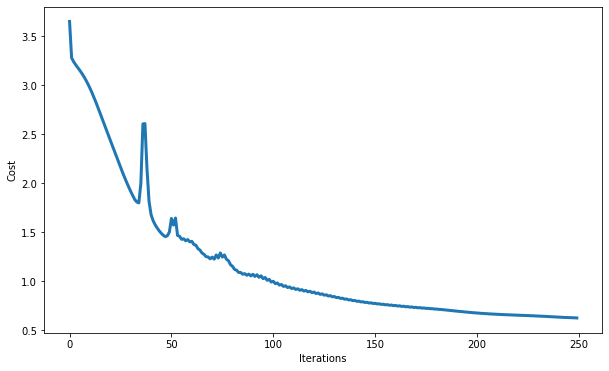

In [29]:
pred, wb, acc_train = gradient_descent(X_train, y_train_ohe, 0.30, 0.0, 250)

In [30]:
acc_train

0.8859

An accuracy $\approx 88.6$

# $\text{8. Cross Validation}$
To select the perfect combo of hyperparameters, i.e., $\alpha, \lambda$ we select a subset (50%) from the test set and seperate it from the set to try our model on different values of $\lambda$. Trying different values of $\alpha$ is subject to several random initialisations of weights to test which alpha works best for which random initialisation. 

In [31]:
X_cv = X_test[0:5000]
y_cv = y_test[0:5000]
y_cv_ohe = y_test_ohe[0:5000]

X_test = X_test[5000:]
y_test = y_test[5000:]
y_test_ohe = y_test_ohe[5000:]

In [32]:
lambda_lst = np.array([0, 0.01, 0.02, 0.04, 0.08,0.16, 0.32, 0.64, 1.28, 2.56])

In [33]:
def predict_cv(X, y, upd_params, lbd):
    #wtb final weights after backprop after all epochs

    Wt_list = (upd_params['W1'], upd_params['W2'], upd_params['W3'])
    prds = np.empty((10,60000))
    A3, che = forward_prop(X, upd_params) #perform forward prop
    cst = cost(y, Wt_list, A3, lbd) #compute cost    
    
    return cst

In [34]:
def cross_validate(lambda_list):
    cost_glb = 1e9
    best_lambda = []
    
    for j in lambda_lst:
        cost_lcl = predict_cv(X_cv, y_cv_ohe, wb, j)
        if(cost_lcl<cost_glb):
            best_lambda.append(j)
            cost_glb = cost_lcl
            print("Current Best Lambda: ", best_lambda[-1], " || Cost: ", cost_lcl)
    
    return best_lambda

In [35]:
lmbd = cross_validate(lambda_lst)

Current Best Lambda:  0.0  || Cost:  0.06395597975904503


Thus a regularization value of 0, i.e., no regularization gives the least cost, that we had chosen earlier even while performing gradient descent

# $\text{9. Performance on Test Set}$

Now that we have the combination of $\alpha, \lambda$ we can finally make predictions on the test set.

In [36]:
y_test_ohe.shape

(5000, 10)

In [37]:
def predict_test(X, y, weights):
    #weights final weights after backprop after all epochs

    weight_list = (weights['W1'], weights['W2'], weights['W3'])
    #y_pred = np.empty((10,y.shape[0]))
    H, che = forward_prop(X, weights) #perform forward prop
    y_pred = predictions(H)
    acc = accuracy(y_pred,np.squeeze(y_test)) #compute accuracy    
    cst = cost(y, weight_list, H, 0.0)
    
    return y_pred, acc, cst

In [38]:
pred, acc_test, cst_test = predict_test(X_test, y_test_ohe, wb)

In [39]:
cst_test

0.0381409151797802

In [40]:
acc_test

0.9176

An accuracy $\approx 92$

In [41]:
pred

array([3, 8, 9, ..., 4, 5, 6], dtype=int64)

In [42]:
y_test.T

array([[3, 9, 9, ..., 4, 5, 6]], dtype=uint8)

Let's plot some predictions and their images

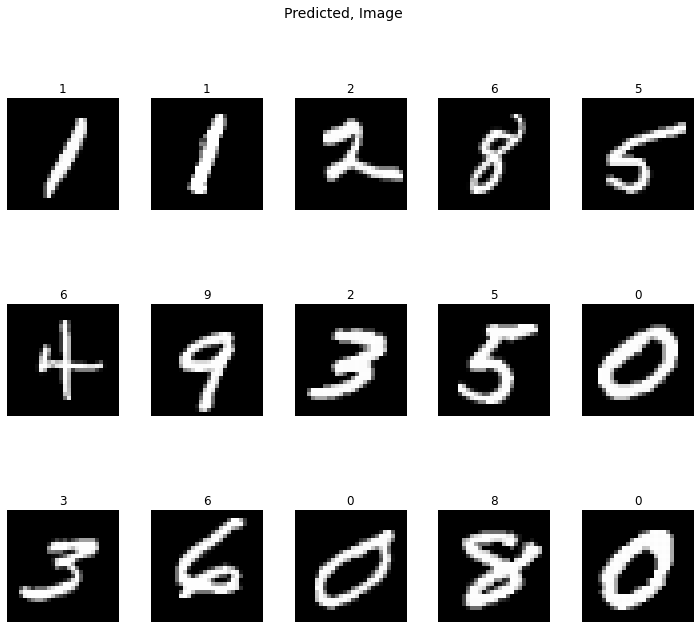

In [43]:
m, n = X_test.shape

fig, axes = plt.subplots(3,5, figsize=(10,10))
fig.tight_layout(pad=0.13,rect=[0, 0.05, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_test[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(pred[random_index])
    ax.set_axis_off()
    fig.suptitle("Predicted, Image", fontsize=14)

# $\text{10. Room for Improvement and Complete Pipeline}$ 

Train accuracy = 88.6% || Test Accuracy = 91.76%
-  The only hyperparameter that was cross validated was $\lambda$. Thus, we can try different values $\alpha$ and test them with several random initialisations. Trying out several random initialisations is a subject to computational complexity, hence was avoided here.

-  The number of iterations/epochs can be experimented with to get a perfect convergence with optimal combination of $\alpha,\lambda$. <b>A value of $(\lambda = 0, \alpha = 0.1)$ showed very smooth convergence without any spikes for this random initialisation</b>. Currently we trained the network only for 250 iterations. An experiment with certain $\alpha,\lambda$ can lead to faster convergence with less iterations. However, it has been proven that if learning rate $\alpha$ is sufficiently small, then cost will decrease on every iteration.

- The architecture of the network, i.e., $[784\rightarrow20\rightarrow15\rightarrow10]$ was chosen for convenience in computational purposes. Of course, these can be tweaked and experimented with for greater accuracy. More no. of units per layer or more layers are some viable options. 

- The cost function has several local minimas and one global minima. The fact that whether we converge to a local minima or global minima is again subject to several random initialisations. These can be experimented with for more accuracy.

In [44]:
def pipeline(): 
    
    import idx2numpy
    import numpy as np
    import matplotlib.pyplot as plt
    #------------------------------Preprocessing and initialising weights, biases-----------------------------------------#
    
    #replace paths with actual file locations
    X_train = idx2numpy.convert_from_file("C:/Users/asus/Desktop/ML Implementation/MNIST HWD/train-images.idx3-ubyte") 
    y_train = idx2numpy.convert_from_file("C:/Users/asus/Desktop/ML Implementation/MNIST HWD/train-labels.idx1-ubyte")
    X_test = idx2numpy.convert_from_file("C:/Users/asus/Desktop/ML Implementation/MNIST HWD/t10k-images.idx3-ubyte")
    y_test = idx2numpy.convert_from_file("C:/Users/asus/Desktop/ML Implementation/MNIST HWD/t10k-labels.idx1-ubyte")
    
    X_train = np.reshape(X_train, (60000, 28*28))
    X_test = np.reshape(X_test, (10000, 28*28))
    y_train = y_train[:,np.newaxis]
    y_train_ohe = np.squeeze(np.eye(10)[y_train.reshape(-1)])
    y_test = y_test[:,np.newaxis]
    y_test_ohe = np.squeeze(np.eye(10)[y_test.reshape(-1)])
    X_cv = X_test[0:5000]
    y_cv = y_test[0:5000]
    y_cv_ohe = y_test_ohe[0:5000]
    X_test = X_test[5000:]
    y_test = y_test[5000:]
    y_test_ohe = y_test_ohe[5000:]
    
    def initialize_parameters():
        np.random.seed(42)# comment this line to try different random initialisations for each runtime
        INIT_EPSILON = 0.5
        W1 = np.random.rand(20,784)*2*(INIT_EPSILON) - INIT_EPSILON; 
        b1 = np.random.rand(20,1)*2*(INIT_EPSILON) - INIT_EPSILON
    
        W2 = np.random.rand(15,20)*2*(INIT_EPSILON) - INIT_EPSILON
        b2 = np.random.rand(15,1)*2*(INIT_EPSILON) - INIT_EPSILON
    
        W3 = np.random.rand(10,15)*2*(INIT_EPSILON) - INIT_EPSILON
        b3 = np.random.rand(10,1)*2*(INIT_EPSILON) - INIT_EPSILON
        
        parameters = {"W1": W1,
                      "b1": b1,
                      "W2": W2,
                      "b2": b2,
                      "W3": W3,
                      "b3": b3}
        
        return parameters

    #-----------------------------------Defining functions for future use------------------------------------------------#
    
    def relu(x):
        return np.maximum(0,x)
    
    def softmax(z):
        ez = np.exp(z)
        sm = ez/np.sum(ez, axis = 0)
        return sm
    
    def relu_deriv(Z):
        return Z > 0
    
    def predictions(A3):
        return np.argmax(A3, axis = 0) 
    
    def accuracy(pred,y):
        return np.sum(pred==y)/y.size
    
    #------------------------------------------Forward propagation----------------------------------------------------------#
    
    def forward_prop(X, parameters):
        caches = []
        A = X.T/255
        layers = 4 
        for l in range(1, layers):
            A_prev = A
            W,b = parameters['W' + str(l)], parameters['b' + str(l)]
            Z = np.matmul(W,A_prev) + b
            cache_1 = (A_prev,W,b)
            cache_2 = (Z)
            cache = (cache_1,cache_2) 
            caches.append(cache)
            A = relu(Z)
        A_final = softmax(A)
        return A_final, caches
    
    #----------------------------------------------Cost Function-----------------------------------------------------------#
    
    def cost(Y_ohe, wt_lst, H, lbd):
        Y_ohe = Y_ohe.T #(60000,10) --> (10,60000)
        term1 = (- 1/60000) * np.sum(np.multiply(Y_ohe,np.log(H)) + np.multiply(1 - Y_ohe, np.log(1 - H)))
        sum = 0
        for w in wt_lst:
            sum = sum + np.sum(np.sum(np.square(w)))
        term2 = (lbd/(2*60000))*sum
        cost = term1 + term2
        return cost
    
    #-----------------------------------------------Back Propagation------------------------------------------------------#
    
    def backward_prop(y_train_ohe, A3, cache): 
        m = 60000
        A0 = cache[0][0][0] 
        W1 = cache[0][0][1]
        Z1 = cache[0][1]
        A1 = cache[1][0][0]
        W2 = cache[1][0][1]
        Z2 = cache[1][1]
        A2 = cache[2][0][0]
        W3 = cache[2][0][1]
        Z3 = cache[2][1]
        grads = []
        dZ3 = A3 - y_train_ohe.T
        dW3 = (1/m) * (dZ3@A2.T)
        db3 = (1/m) * (np.sum(dZ3))
        c3 = (dW3, db3)
        dZ2 = np.multiply((W3.T@dZ3), relu_deriv(Z2))
        dW2 = (1/m) * (dZ2@A1.T)
        db2 = (1/m) * (np.sum(dZ2))
        c2 = (dW2, db2)
        dZ1 = np.multiply((W2.T@dZ2), relu_deriv(Z1))
        dW1 = (1/m) * (dZ1@A0.T)
        db1 = (1/m) * (np.sum(dZ1))
        c1 = (dW1, db1)
        grads = [c1,c2,c3]
        return grads
    
    #---------------------------------------------------Updating Parameters-----------------------------------------------------#
    
    def update_params(cache, grads, alpha):
        W1 = cache[0][0][1]
        b1 = cache[0][0][2]
        W2 = cache[1][0][1]
        b2 = cache[1][0][2]
        W3 = cache[2][0][1]
        b3 = cache[2][0][2]
        dW1 = grads[0][0]
        db1 = grads[0][1]
        dW2 = grads[1][0]
        db2 = grads[1][1]
        dW3 = grads[2][0]
        db3 = grads[2][1]
        W1 = W1 - alpha*dW1
        b1 = b1 - alpha*db1
        W2 = W2 - alpha*dW2
        b2 = b2 - alpha*db2
        W3 = W3 - alpha*dW3
        b3 = b3 - alpha*db3
        return W1,b1,W2,b2,W3,b3
    
    #----------------------------------------------Gradient Descent-------------------------------------------------------------#
    
    def gradient_descent(X, y, alpha, lbd, epochs):
        upd = np.empty((epochs,1))
        params = initialize_parameters() #initialise params
        Wt_list = (params['W1'], params['W2'], params['W3'])
        prds = np.empty((10,60000))
        acc = 0
        for i in range(epochs):
            A3, che = forward_prop(X, params)
            upd[i] = cost(y, Wt_list, A3, lbd)
            grd = backward_prop(y_train_ohe, A3, che)
            W1,b1,W2,b2,W3,b3 = update_params(che, grd, alpha)
            params['W1'] = W1
            params['b1'] = b1
            params['W2'] = W2
            params['b2'] = b2
            params['W3'] = W3
            params['b3'] = b3
            prds = predictions(A3)
            acc = accuracy(prds,np.squeeze(y_train)) 
            if(i%50==0):
                print("Cost: ", np.round(upd[i], decimals = 4), "|| Accuracy: ", np.round(acc, decimals = 4)," for epoch ",(i+1)) #"
            if(i==epochs-1):
                print("Final Cost: ", np.round(upd[i], decimals = 4), "|| Final Accuracy: ", np.round(acc, decimals = 4)," for epoch ",(i+1))
        plt.figure(figsize=(10,6))
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.plot(range(epochs),upd,'-', lw = 3)
        return prds, params, acc
    
    #------------------------------------------------------Cross Validation-----------------------------------------------#
    
    lambda_lst = np.array([0, 0.01, 0.02, 0.04, 0.08,0.16, 0.32, 0.64, 1.28, 2.56])
    def predict_cv(X, y, upd_params, lbd):
        Wt_list = (upd_params['W1'], upd_params['W2'], upd_params['W3'])
        prds = np.empty((10,60000))
        A3, che = forward_prop(X, upd_params)
        cst = cost(y, Wt_list, A3, lbd)
        return cst
    
    def cross_validate(lambda_list):
        cost_glb = 1e9
        best_lambda = []
        for j in lambda_lst:
            cost_lcl = predict_cv(X_cv, y_cv_ohe, wb, j)
            if(cost_lcl<cost_glb):
                best_lambda.append(j)
                cost_glb = cost_lcl
                print("Current Best Lambda: ", best_lambda[-1], " || Cost: ", cost_lcl)
        return best_lambda
    
    #-------------------------------------------Performance on Test Set----------------------------------------------------#
    
    def predict_test(X, y, weights):
        weight_list = (weights['W1'], weights['W2'], weights['W3'])
        H, che = forward_prop(X, weights) #perform forward prop
        y_pred = predictions(H)
        acc = accuracy(y_pred,np.squeeze(y_test)) #compute accuracy    
        cst = cost(y, weight_list, H, 0.0)
        return y_pred, acc, cst
    
    #-----------------------------------------------Runtime---------------------------------------------------------------#
    
    print("Training the network.....")
    pred_train, wb, acc_train = gradient_descent(X_train, y_train_ohe, 0.30, 0.0, 250)
    print("Cross validating for best Lambda.....")
    lmbd = cross_validate(lambda_lst)
    print("Replace lambda with: ", lmbd, " for best results.")
    print("Predicting on test set.....")
    pred_test, acc_test, cst_test = predict_test(X_test, y_test_ohe, wb)
    m, n = X_test.shape
    fig, axes = plt.subplots(3,5, figsize=(10,10))
    fig.tight_layout(pad=0.13,rect=[0, 0.05, 1, 0.91]) #[left, bottom, right, top]
    
    print("\n\nTraining Accuracy: ", acc_train*100,"%", " || Testing Accuracy: ", np.round(acc_test*100, decimals =  2),"%", " || Testing Cost: ", cst_test)
    for i,ax in enumerate(axes.flat):
        random_index = np.random.randint(m)
        X_random_reshaped = X_test[random_index].reshape((28,28))
        ax.imshow(X_random_reshaped, cmap='gray')
        ax.set_title(pred[random_index])
        ax.set_axis_off()
        fig.suptitle("Predicted, Image", fontsize=14)

Training the network.....
Cost:  [3.6511] || Accuracy:  0.0956  for epoch  1
Cost:  [1.6419] || Accuracy:  0.6416  for epoch  51
Cost:  [1.0012] || Accuracy:  0.7976  for epoch  101
Cost:  [0.7766] || Accuracy:  0.8527  for epoch  151
Cost:  [0.6772] || Accuracy:  0.8757  for epoch  201
Final Cost:  [0.627] || Final Accuracy:  0.8859  for epoch  250
Cross validating for best Lambda.....
Current Best Lambda:  0.0  || Cost:  0.06395597975904503
Replace lambda with:  [0.0]  for best results.
Predicting on test set.....


Training Accuracy:  88.59 %  || Testing Accuracy:  91.76 %  || Testing Cost:  0.0381409151797802


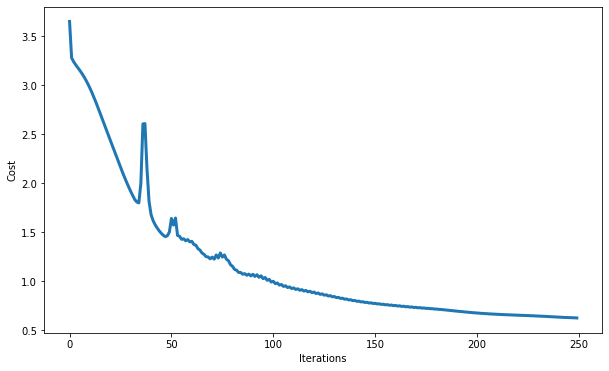

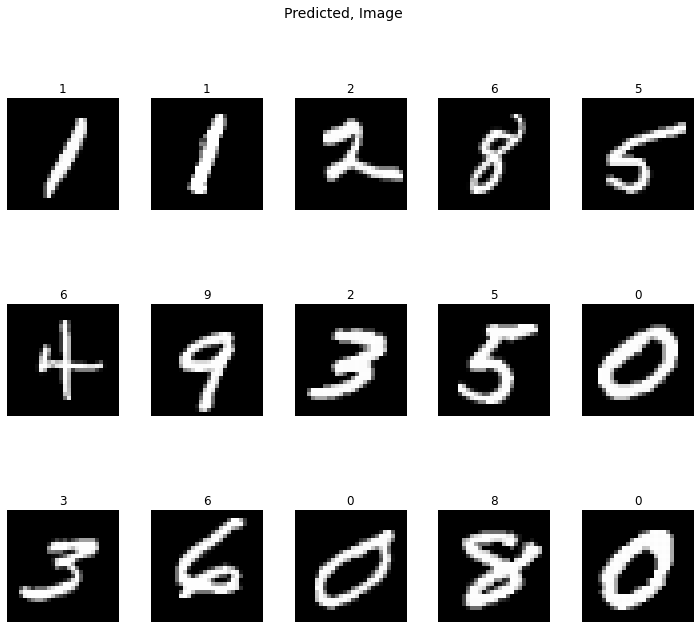

In [45]:
pipeline()

---
<p style="text-align:right; font-family:'Old English';"><i>By: Shreeyansh Das</i></p>
